In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')
from importlib import reload

import seaborn as sns
sns.set(color_codes=True,rc={'figure.figsize':(11.7,8.27)})

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train.shape

(42000, 785)

In [4]:
train.drop_duplicates().shape

(42000, 785)

In [5]:
train.isnull().sum().unique()

array([0], dtype=int64)

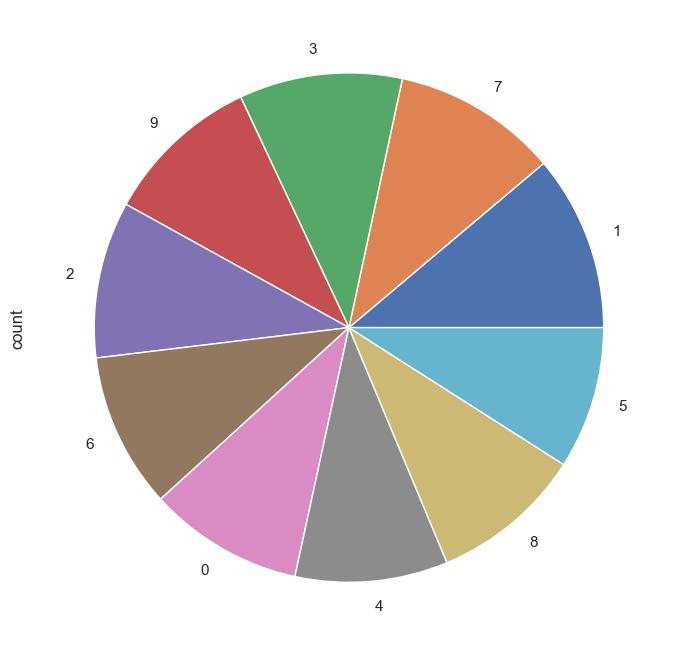

In [6]:
train['label'].value_counts().plot.pie();

Нет nan-значений, нет дубликатов, равное распределние групп

In [7]:
X = train.drop('label', axis=1)
y = train['label']

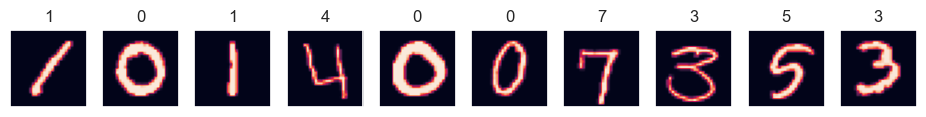

In [8]:
for i in range(10):
    ax = plt.subplot(1,10 ,i+1)
    im=ax.imshow(X.iloc[i].values.reshape(28,28))
    plt.xlabel=''
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.title(y.iloc[i])

In [16]:
plt = reload(plt)

Text(0, 0.5, 'PC2')

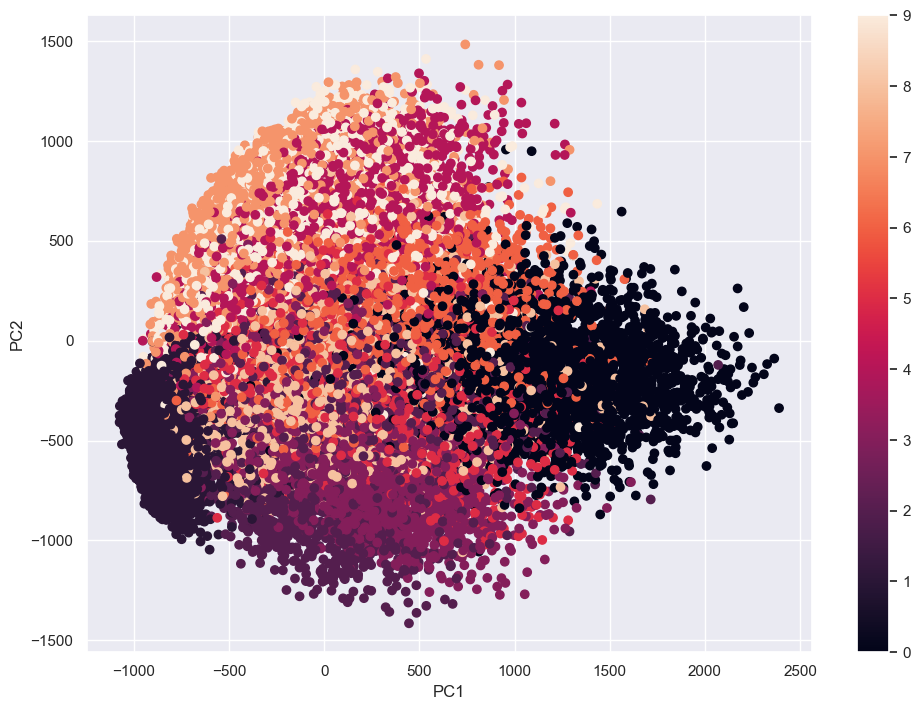

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.colorbar()

plt.xlabel("PC1")
plt.ylabel("PC2")

Уже при двух компонентах видны некоторые кластеры, посмотрим, что произойдет при увеличении компонент

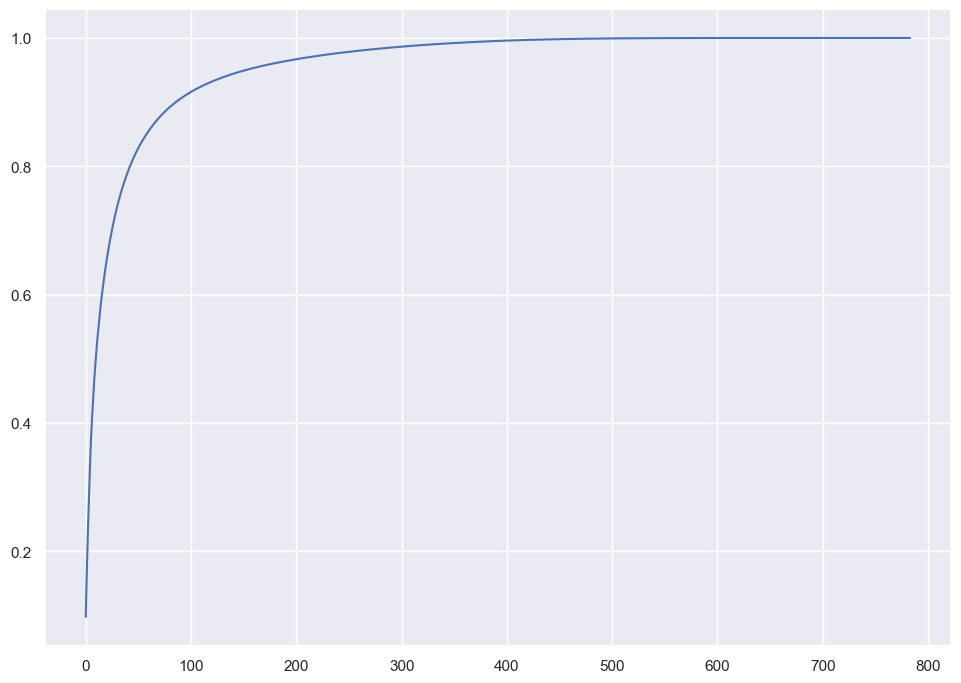

In [20]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_));

Уже 100 компонент объясняют более 90% дисперсии в данных. Но построим также график для результатов работы knn при различном числе компонент 

In [22]:
from sklearn.model_selection import train_test_split
def clf_score(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
n_components = [1, 3, 5, 10, 15, 20, 30, 50, 100, 200]
score = np.zeros(len(n_components))
knn = KNeighborsClassifier()


for (i, n) in enumerate(n_components):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    score[i] = clf_score(knn, X_pca, y)

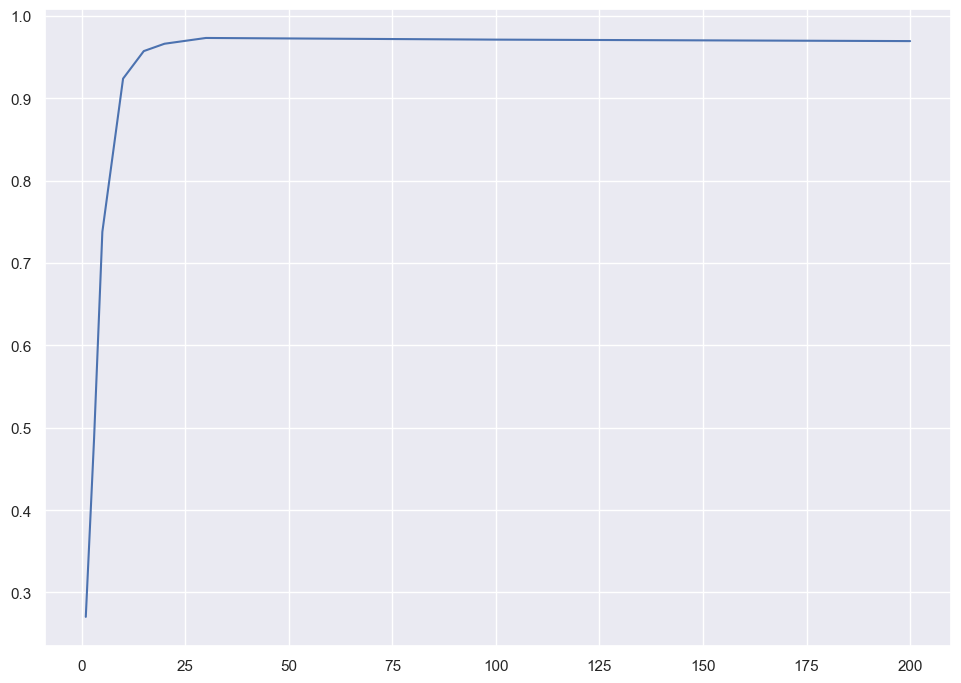

In [31]:
plt.plot(n_components, score);

При 30 компонентах и более точность модели ближе всего к единице. При дальнейшем увеличении числа компонент точность падает, происходит переобучение модели

In [33]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
test_pca = pca.transform(test)

knn = KNeighborsClassifier()
knn.fit(X_pca, y)

pred = knn.predict(test_pca)

In [34]:
Submission = pd.DataFrame({
        "ImageId": range(1, pred.shape[0]+1),
        "Label": pred
    })

Submission.to_csv("KnnSubmission.csv", index=False)

Submission.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


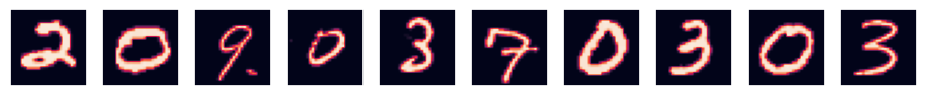

In [35]:
for i in range(10):
    ax = plt.subplot(1,10 ,i+1)
    im=ax.imshow(test.iloc[i].values.reshape(28,28))
    plt.xlabel=''
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

Score = 0.974